<a href="https://colab.research.google.com/github/shesh19/enron1/blob/main/Business_report_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Enron Email Data



### Full/Complete Dataset

The following code-cell will download the complete Enron email database to the Colab instance.  It will take about 1-2 mins to download.

In [ ]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-26 05:16:21--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-26 05:16:22--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  66.5MB/s    in 18s     

2023-05-26 05:16:41 (44.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect("enron.db")

In [ ]:
cur = conn.cursor()

**Check schema of database**

In [ ]:
sql="""
SELECT name
FROM sqlite_master
WHERE type='table';
"""

cur.execute(sql)
cur.fetchall()

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

**Check schema of tables**

In [ ]:
#Check Schema of table employeelist using PRAGMA
sql="""
PRAGMA table_info('employeelist');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'eid', 'INTEGER', 1, None, 1),
 (1, 'firstName', 'VARCHAR(31)', 1, "''", 0),
 (2, 'lastName', 'VARCHAR(31)', 1, "''", 0),
 (3, 'Email_id', 'VARCHAR(31)', 1, "''", 0),
 (4, 'Email2', 'VARCHAR(31)', 0, None, 0),
 (5, 'Email3', 'VARCHAR(31)', 0, None, 0),
 (6, 'EMail4', 'VARCHAR(31)', 0, None, 0),
 (7, 'folder', 'VARCHAR(31)', 1, "''", 0),
 (8, 'status', 'VARCHAR(50)', 0, None, 0)]

In [ ]:
#Check Schema of table message using PRAGMA
sql="""
PRAGMA table_info('message');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'mid', 'INTEGER', 1, "'0'", 1),
 (1, 'sender', 'VARCHAR(127)', 1, "''", 0),
 (2, 'date', 'DATETIME', 0, None, 0),
 (3, 'message_id', 'VARCHAR(127)', 0, None, 0),
 (4, 'subject', 'TEXT', 0, None, 0),
 (5, 'body', 'TEXT', 0, None, 0),
 (6, 'folder', 'VARCHAR(127)', 1, "''", 0)]

In [ ]:
#Check Schema of table recipientinfo using PRAGMA
sql="""
PRAGMA table_info('recipientinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

In [ ]:
#Check Schema of table referenceinfo using PRAGMA
sql="""
PRAGMA table_info('referenceinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rfid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'reference', 'TEXT', 0, None, 0)]

**Fetching data from tables**

**PANDA**

 **Using Pandas library to read database and load data into a dataframe**

In [ ]:
import pandas as pd

sql='''
SELECT * from employeelist;
'''
# Load the data into a DataFrame
employeelist_df = pd.read_sql_query(sql, conn)
employeelist_df

,eid,firstName,lastName,Email_id,Email2,Email3,EMail4,folder,status
0,1,Robert,Badeer,robert.badeer@enron.com,rbadeer@enron.com,,,badeer-r,Director
1,2,Kevin,Hyatt,kevin.hyatt@enron.com,kevin_hyatt@enron.com,khyatt@enron.com,,hyatt-k,Director
2,3,Tracy,Geaccone,tracy.geaccone@enron.com,tracy_geaconne@enron.com,,,geaccone-t,Employee
3,4,Teb,Lokey,teb.lokey@enron.com,teb_lokey@enron.com,tlokey@enron.com,,lokey-t,Manager
4,5,Richard,Ring,richard.ring@enron.com,,,,ring-r,Employee
...,...,...,...,...,...,...,...,...,...
144,146,Steven,South,steven.p.south@enron.com,steven.south@enron.com,p..south@enron.com,,south-s,N/A
145,147,Carol,Clair,carol.clair@enron.com,carol.st.clair@enron.com,carol.stclair@enron.com,,stclair-c,Vice President
146,148,Chris,Stokley,chris.stokley@enron.com,,,,stokley-c,N/A
147,149,Kate,Symes,kate.symes@enron.com,ksymes@enron.com,,,symes-k,Employee


In [ ]:
import pandas as pd

sql='''
SELECT * from message;
'''
# Load the data into a DataFrame
message_df = pd.read_sql_query(sql, conn)
message_df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


In [ ]:
import pandas as pd

sql='''
SELECT * from recipientinfo;
'''
# Load the data into a DataFrame
recipientinfo_df = pd.read_sql_query(sql, conn)
recipientinfo_df

,rid,mid,rtype,rvalue,dater
0,67,52,TO,all.worldwide@enron.com,None
1,68,53,TO,all.downtown@enron.com,None
2,69,54,TO,all.enron-worldwide@enron.com,None
3,70,55,TO,all.worldwide@enron.com,None
4,71,56,TO,all_enron_north.america@enron.com,None
...,...,...,...,...,...
2064437,3242059,404927,BCC,john.anderson@enron.com,None
2064438,3242060,404927,BCC,mark.guzman@enron.com,None
2064439,3242061,404927,BCC,michael.mier@enron.com,None
2064440,3242062,404927,BCC,pete.davis@enron.com,None


In [ ]:
import pandas as pd

sql='''
SELECT * from referenceinfo;
'''
# Load the data into a DataFrame
referenceinfo_df = pd.read_sql_query(sql, conn)
referenceinfo_df

,rfid,mid,reference
0,2,79,"> From: Le Vine, Debi> Sent: Thursday, August ..."
1,3,99,"> From: Golden, Mark> Sent: Thursday, August 2..."
2,8,533,"From: Sole, JeanneSent: Friday, August 18, 200..."
3,13,842,"From: \tGrigsby, Mike Sent:\tThursday, March ..."
4,14,845,"From: Monaco, John [EM] [mailto:john.monaco@ci..."
...,...,...,...
54773,63020,404873,From: \tEnron Announcements/Corp/Enron@ENRON ...
54774,63021,404888,"From: \tBlair, Kit Sent:\tWednesday, November..."
54775,63022,404907,"From: \tDean, Craig Sent:\tThursday, January ..."
54776,63023,404918,"From: \tDean, Craig Sent:\tTuesday, February ..."


**Data Manipulation**
Email Testing

In [ ]:
#cheking whether there is null values or not
sql= """
SELECT  date
FROM message
"""



In [ ]:
# convert into data frames


import pandas as pd

message_df = pd.read_sql_query(sql, conn)

message_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252759 entries, 0 to 252758
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    252759 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


In [ ]:


#Grouping/counting emails per day
sql = """
SELECT strftime('%Y-%m-%d', date)
AS date,
COUNT(*) AS count FROM message
GROUP BY date

"""


#put into a dateframe
day_df = pd.read_sql_query(sql, conn)
day_df

,date,count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
194082,2020-12-29,1
194083,2043-12-28,1
194084,2044-01-02,1
194085,2044-01-04,1


In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt


<Axes: xlabel='date', ylabel='count'>

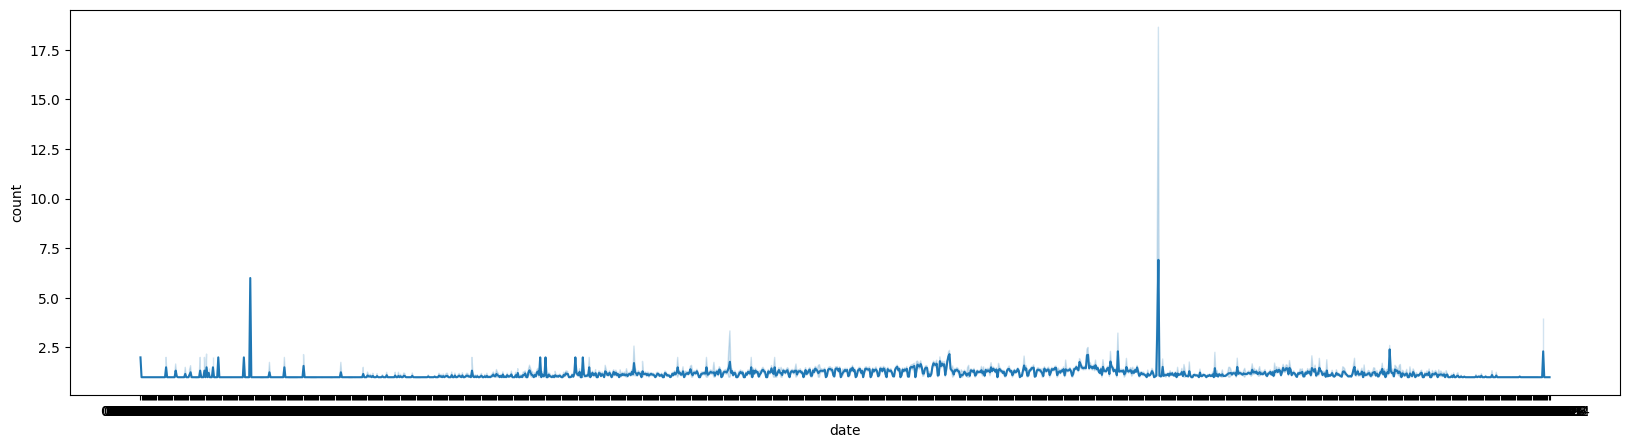

In [ ]:
#plotting a graph showing email traffic for a day
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x='date', y='count', data= day_df)

In [ ]:
#Grouping/counting emails per week
sql = """
SELECT strftime('%Y-%W', date)
AS week,
COUNT(*) AS count FROM message
GROUP BY week

"""


#put into a dateframe
week_df = pd.read_sql_query(sql, conn)
week_df

,week,count
0,0001-22,2
1,0001-25,1
2,0001-30,1
3,0001-31,1
4,0001-32,1
...,...,...
242,2020-51,1
243,2020-52,1
244,2043-52,1
245,2044-00,1


<Axes: xlabel='week', ylabel='count'>

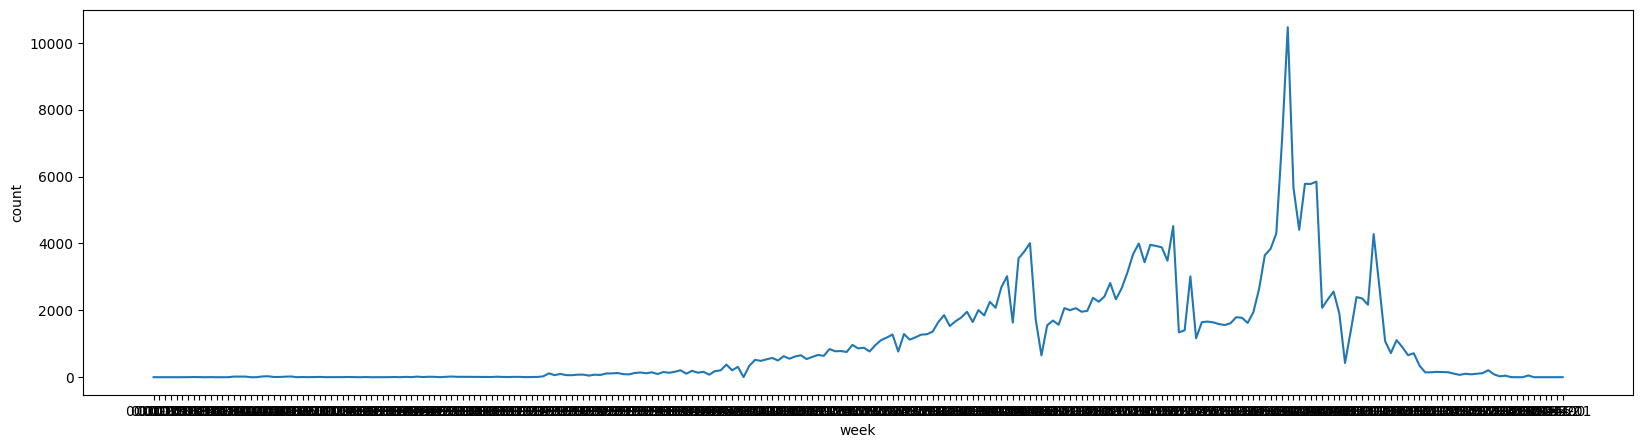

In [ ]:
#plotting a graph to show emails traffic over a week
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x='week', y='count', data=week_df)

In [ ]:
#Grouping/counting emails per month
sql = """
SELECT strftime('%Y/%m', date)
AS date,
COUNT(*) AS count FROM message
GROUP BY date

"""


#put into a dateframe
month_df = pd.read_sql_query(sql, conn)
month_df

,date,count
0,0001/05,2
1,0001/06,1
2,0001/07,1
3,0001/08,1
4,0001/08,1
...,...,...
194082,2020/12,1
194083,2043/12,1
194084,2044/01,1
194085,2044/01,1


<Axes: xlabel='date', ylabel='count'>

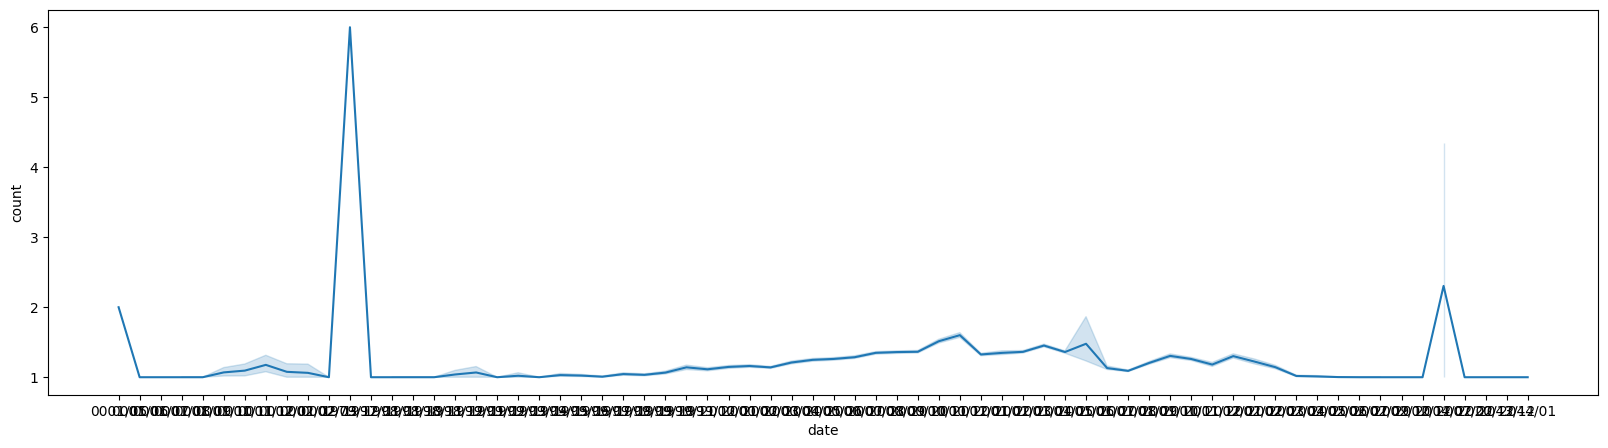

In [ ]:
#plotting a graph to show email traffic over a month
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x='date', y='count', data=month_df)

# SQLite3 Support Tools

Some tools to inspect the database (*Not needed for assignment*)

* [DB Browser for SQLite3](https://sqlitebrowser.org/)
* [SQLiteStudio](https://sqlitestudio.pl/)

In [ ]:
#plotting line grapgh
import seaborn as sns


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as  pd

PART 2 - CONCERNING RECIPIENTS

In [ ]:
#sql query to count the num of emails by each sender
sql_senders = """
SELECT sender, COUNT(*) AS count 
FROM message
GROUP BY sender
ORDER BY COUNT
DESC
LIMIT 12
"""


In [ ]:
#convert data from dataframe
senders_df = pd.read_sql_query(sql_senders, conn)
senders_df

,sender,count
0,jeff.dasovich@enron.com,6273
1,j.kaminski@enron.com,5838
2,kay.mann@enron.com,5100
3,sara.shackleton@enron.com,4797
4,tana.jones@enron.com,4437
5,chris.germany@enron.com,3686
6,no.address@enron.com,3511
7,enron.announcements@enron.com,2838
8,matthew.lenhart@enron.com,2784
9,debra.perlingiere@enron.com,2549


<function matplotlib.pyplot.show(close=None, block=None)>

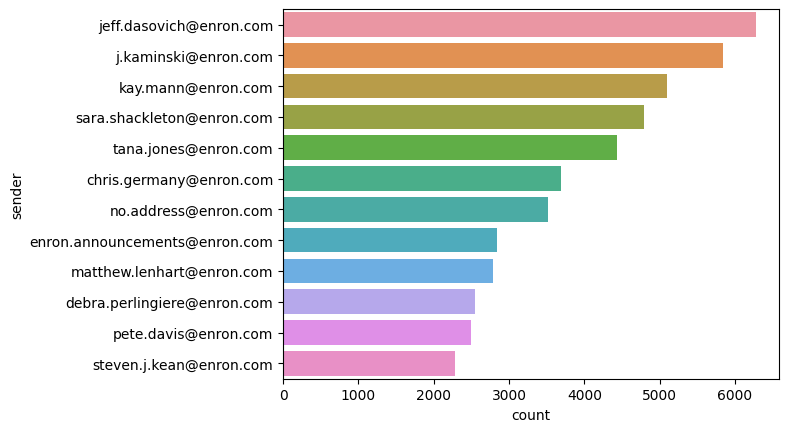

In [ ]:
#plotting dataframe using bar plot for senders
sns.barplot(x = 'count', y = 'sender', data = senders_df)
plt.show

In [ ]:
#sql query to count the num of emails by each recipient
sql_recipients = """
SELECT rvalue AS recipient, COUNT(*)
AS count 
FROM recipientinfo
GROUP BY recipient
ORDER BY count 
DESC
LIMIT 12
"""


In [ ]:
#convert data from dataframe
recipients_df = pd.read_sql_query(sql_recipients, conn)
recipients_df

,recipient,count
0,no.address@enron.com,19198
1,jeff.dasovich@enron.com,11137
2,richard.shapiro@enron.com,11015
3,steven.j.kean@enron.com,10873
4,james.d.steffes@enron.com,10615
5,tana.jones@enron.com,9781
6,sara.shackleton@enron.com,9633
7,mark.e.taylor@enron.com,9090
8,louise.kitchen@enron.com,7603
9,pete.davis@enron.com,7509


<function matplotlib.pyplot.show(close=None, block=None)>

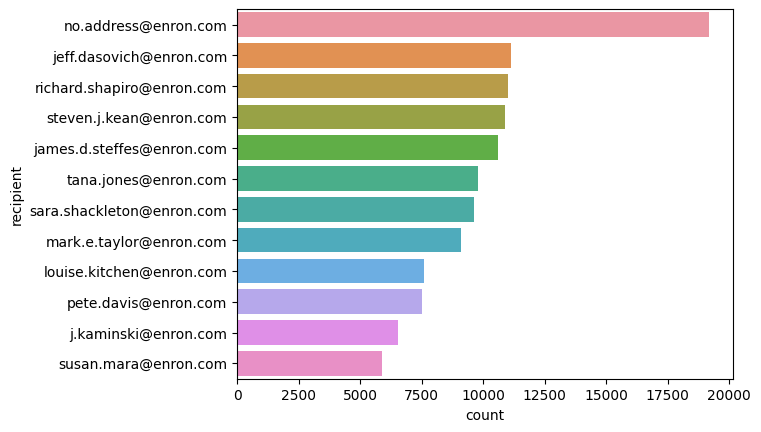

In [ ]:
#plotting dataframe using bar plot for recipients
sns.barplot(x = 'count', y = 'recipient', data = recipients_df)
plt.show

Email Distribution by Recipient Type


In [ ]:
#sql query to categorize by rtype using count
sql_recipient_type = """ 
SELECT rtype, COUNT(rtype)
AS count

FROM recipientinfo
GROUP by rtype
ORDER by rtype
"""

In [ ]:
#convert data in dataframe
recipient_df = pd.read_sql_query(sql_recipient_type, conn)
recipient_df

,rtype,count
0,BCC,253713
1,CC,253735
2,TO,1556994


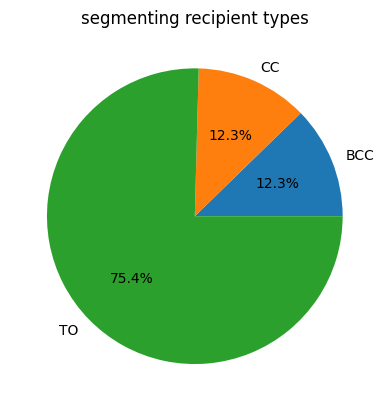

In [ ]:
#plotting a piechart showing recipient types
labels = recipient_df['rtype']
values = recipient_df['count']
plt.pie(values, labels= labels, autopct='%1.1f%%')

plt.title('segmenting recipient types')
plt.show()